In [557]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. Load the Datasets
df = pd.read_csv('hair_fall.csv')
df1 = pd.read_csv('hairfall2.csv')
df2 = pd.read_csv('hairfall3.csv')


from sklearn.preprocessing import LabelEncoder

# Rename the column
df2.rename(columns={'Do you have hair fall problem ?': 'Hair Loss'}, inplace=True)

# List of columns to label encode
columns_to_encode = [
    'What is your name ?', 'What is your gender ?', 'Hair Loss',
    'Is there anyone in your family having a hair fall problem or a baldness issue?',
    'Did you face any type of chronic illness in the past?', 'Do you stay up late at night?',
    'Do you have any type of sleep disturbance?', 'Do you think that in your area water is a reason behind hair fall problems?',
    'Do you use chemicals, hair gel, or color in your hair?', 'Do you have anemia?',
    'Do you have too much stress', 'What is your food habit'
]

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to each column
for column in columns_to_encode:
    df2[column] = le.fit_transform(df2[column])

df2.head()

df2.drop(columns=['Timestamp', 'What is your name ?'], inplace=True)

df['Label'] = df['Hair Loss']
df1['Label'] = df1['Label']  # Already named correctly in df1


df1.rename(columns={'Age(Yrs.)': 'Age'}, inplace=True)  # Align target column name
df2.rename(columns={'What is your age ?': 'Age', 'What is your gender ?': 'Gender', 'Hair Loss': 'Label'}, inplace=True) 

In [558]:
df1['Enviromental_factor'] = df1['Radiation']

In [559]:
df1.columns

Index(['Gender', 'Age', 'Marital_Status', 'Father', 'Mother', 'Grand_Father',
       'Grand_Mother', 'Siblings', 'Pregnant', 'Radiation', 'Hairline_Pattern',
       'Hairstyle', 'Density', 'Hair_Fall_Rate', 'Scalp_Infection',
       'Pain_Itch', 'Nutrition', 'Weight_Loss', 'Sleeping_Pattern',
       'Chemical_Products', 'Medication', 'Region', 'Label',
       'Enviromental_factor'],
      dtype='object')

In [560]:
df.columns

Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies', 'Stress', 'Age',
       'Poor Hair Care Habits', 'Environmental Factors', 'Smoking',
       'Weight Loss', 'Hair Loss', 'Label'],
      dtype='object')

In [561]:
import pandas as pd


# Renaming columns in df1
df.rename(columns={
    'Medications & Treatments': 'Medication',
    'Nutritional Deficiencies': 'Nutrition',
    'Environmental Factors': 'Enviromental_factor'
}, inplace=True)

# Renaming columns in df2
df2.rename(columns={
    'Do you have too much stress': 'Stress',
    'What is your food habit': 'Food_Habit',
    'Is there anyone in your family having a hair fall problem or a baldness issue?': 'Genetics',
    'Do you stay up late at night?': 'Sleeping_Pattern',
    'Do you use chemicals, hair gel, or color in your hair?':  'Chemical_Products'

}, inplace=True)



df.drop(columns=['Hair Loss','Id'], inplace=True)

df1.drop(columns=['Region','Radiation'], inplace=True)



In [562]:
df.columns

Index(['Genetics', 'Hormonal Changes', 'Medical Conditions', 'Medication',
       'Nutrition', 'Stress', 'Age', 'Poor Hair Care Habits',
       'Enviromental_factor', 'Smoking', 'Weight Loss', 'Label'],
      dtype='object')

In [563]:
df1.columns

Index(['Gender', 'Age', 'Marital_Status', 'Father', 'Mother', 'Grand_Father',
       'Grand_Mother', 'Siblings', 'Pregnant', 'Hairline_Pattern', 'Hairstyle',
       'Density', 'Hair_Fall_Rate', 'Scalp_Infection', 'Pain_Itch',
       'Nutrition', 'Weight_Loss', 'Sleeping_Pattern', 'Chemical_Products',
       'Medication', 'Label', 'Enviromental_factor'],
      dtype='object')

In [564]:
df2.columns

Index(['Age', 'Gender', 'Label', 'Genetics',
       'Did you face any type of chronic illness in the past?',
       'Sleeping_Pattern', 'Do you have any type of sleep disturbance?',
       'Do you think that in your area water is a reason behind hair fall problems?',
       'Chemical_Products', 'Do you have anemia?', 'Stress', 'Food_Habit'],
      dtype='object')

In [565]:


# Merge df1 and df2 on common columns (Age, Gender, Label, Sleeping_Pattern, Chemical_Products)
merged_df1 = pd.merge(df1, df2, on=['Age', 'Gender', 'Label', 'Sleeping_Pattern', 'Chemical_Products'], how='outer')

# Now merge the above result with df on common columns (Age, Label, Genetics, Stress)
main_data = pd.merge(merged_df1, df, on=['Age', 'Label', 'Genetics', 'Stress','Enviromental_factor','Medication','Nutrition'], how='outer')

In [566]:
main_data.columns

Index(['Gender', 'Age', 'Marital_Status', 'Father', 'Mother', 'Grand_Father',
       'Grand_Mother', 'Siblings', 'Pregnant', 'Hairline_Pattern', 'Hairstyle',
       'Density', 'Hair_Fall_Rate', 'Scalp_Infection', 'Pain_Itch',
       'Nutrition', 'Weight_Loss', 'Sleeping_Pattern', 'Chemical_Products',
       'Medication', 'Label', 'Enviromental_factor', 'Genetics',
       'Did you face any type of chronic illness in the past?',
       'Do you have any type of sleep disturbance?',
       'Do you think that in your area water is a reason behind hair fall problems?',
       'Do you have anemia?', 'Stress', 'Food_Habit', 'Hormonal Changes',
       'Medical Conditions', 'Poor Hair Care Habits', 'Smoking',
       'Weight Loss'],
      dtype='object')

In [567]:
main_data.duplicated().sum()

455

In [568]:
main_data.drop_duplicates(inplace=True)

In [569]:
main_data.isnull().sum()

Gender                                                                          998
Age                                                                               1
Marital_Status                                                                 1481
Father                                                                         1481
Mother                                                                         1481
Grand_Father                                                                   1481
Grand_Mother                                                                   1481
Siblings                                                                       1481
Pregnant                                                                       1481
Hairline_Pattern                                                               1481
Hairstyle                                                                      1481
Density                                                                     

In [570]:
numerical_columns = ['Age', 'Hair_Fall_Rate']

# Fill numerical columns with median
main_data[numerical_columns] = main_data[numerical_columns].apply(lambda x: x.fillna(x.median()) if x.dtype != 'object' else x)

# Columns to treat as categorical (binary)
categorical_columns = ['Gender', 'Marital_Status', 'Father', 'Mother', 'Grand_Father', 'Grand_Mother', 'Siblings', 
                       'Pregnant', 'Nutrition','Hairline_Pattern', 'Hairstyle', 'Density', 'Scalp_Infection', 'Pain_Itch', 'Weight_Loss', 
                       'Sleeping_Pattern', 'Chemical_Products', 'Medication', 'Enviromental_factor', 'Genetics', 
                       'Did you face any type of chronic illness in the past?', 'Do you have any type of sleep disturbance?', 
                       'Do you think that in your area water is a reason behind hair fall problems?', 'Do you have anemia?', 
                       'Stress', 'Food_Habit', 'Hormonal Changes', 'Medical Conditions', 'Poor Hair Care Habits', 'Smoking', 'Weight Loss']

# Fill categorical columns (binary values) with mode
main_data[categorical_columns] = main_data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Check if there are still any missing values
print(main_data.isnull().sum())  

Gender                                                                         0
Age                                                                            0
Marital_Status                                                                 0
Father                                                                         0
Mother                                                                         0
Grand_Father                                                                   0
Grand_Mother                                                                   0
Siblings                                                                       0
Pregnant                                                                       0
Hairline_Pattern                                                               0
Hairstyle                                                                      0
Density                                                                        0
Hair_Fall_Rate              

In [571]:
main_data

,Gender,Age,Marital_Status,Father,Mother,Grand_Father,Grand_Mother,Siblings,Pregnant,Hairline_Pattern,...,Do you have any type of sleep disturbance?,Do you think that in your area water is a reason behind hair fall problems?,Do you have anemia?,Stress,Food_Habit,Hormonal Changes,Medical Conditions,Poor Hair Care Habits,Smoking,Weight Loss
0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
1,2.0,20.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
2,0.0,20.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
3,0.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
4,0.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,9.0,1.0,1.0,1.0
2610,0.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,0.0,1.0
2611,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0
2612,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,2.0,0.0,1.0,2.0,1.0,1.0,1.0


In [572]:
from sklearn.utils import resample

# Assuming main_data is your merged dataset with 554 rows and 37 columns

# 1. Randomly resample (with replacement) to increase the number of rows
# Upsample to 30,000 rows using resampling

# Create a dataframe with 30000 rows by resampling with replacement
main_data = resample(main_data, 
                          replace=True,       # Sample with replacement
                          n_samples=70000,    # Increase number of rows to 30,000
                          random_state=42)    # For reproducibility

# 2. Noise Injection on Numerical Columns (e.g., Age, Genetics, Medication)
# Let's add random noise to numerical columns

numerical_columns = ['Age', 'Genetics', 'Medication', 'Enviromental_factor', 'Nutrition']  # Example numerical columns

for col in numerical_columns:
    noise = np.random.normal(0, 0.05, size=main_data[col].shape)  # Adding random noise with small standard deviation
    main_data[col] += noise  # Add the noise

# 3. For Categorical Data (Optional): Slightly modify categorical values to add variations
categorical_columns = ['Gender', 'Label', 'Sleeping_Pattern', 'Chemical_Products', 'Stress']  # Example categorical columns

for col in categorical_columns:
    main_data[col] = main_data[col].apply(lambda x: x if np.random.rand() > 0.05 else np.random.choice(main_data[col].unique()))

# Display the augmented dataset shape and a sample
print(main_data.shape)  # Should print (30000, 37)
print(main_data.head())  # Show first few rows of the augmented data


(70000, 34)
      Gender        Age  Marital_Status  Father  Mother  Grand_Father  \
957      1.0  20.032122             0.0     0.0     0.0           0.0   
1748     0.0  41.994617             0.0     0.0     0.0           0.0   
1301     0.0  15.076524             0.0     0.0     0.0           0.0   
1264     1.0  14.967336             0.0     0.0     0.0           0.0   
2093     0.0  49.089885             0.0     0.0     0.0           0.0   

      Grand_Mother  Siblings  Pregnant  Hairline_Pattern  ...  \
957            0.0       0.0       0.0               1.0  ...   
1748           0.0       0.0       0.0               1.0  ...   
1301           0.0       0.0       0.0               1.0  ...   
1264           0.0       0.0       0.0               1.0  ...   
2093           0.0       0.0       0.0               1.0  ...   

      Do you have any type of sleep disturbance?  \
957                                          1.0   
1748                                         1.0   
13

In [573]:
main_data

,Gender,Age,Marital_Status,Father,Mother,Grand_Father,Grand_Mother,Siblings,Pregnant,Hairline_Pattern,...,Do you have any type of sleep disturbance?,Do you think that in your area water is a reason behind hair fall problems?,Do you have anemia?,Stress,Food_Habit,Hormonal Changes,Medical Conditions,Poor Hair Care Habits,Smoking,Weight Loss
957,1.0,20.032122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
1748,0.0,41.994617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0
1301,0.0,15.076524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,0.0
1264,1.0,14.967336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
2093,0.0,49.089885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.0,25.041934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
2113,0.0,50.027814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0
302,0.0,25.998126,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
2552,0.0,38.013060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,10.0,1.0,1.0,1.0


In [574]:
main_data.isnull().sum()

Gender                                                                         0
Age                                                                            0
Marital_Status                                                                 0
Father                                                                         0
Mother                                                                         0
Grand_Father                                                                   0
Grand_Mother                                                                   0
Siblings                                                                       0
Pregnant                                                                       0
Hairline_Pattern                                                               0
Hairstyle                                                                      0
Density                                                                        0
Hair_Fall_Rate              

In [575]:
numerical_columns = ['Age', 'Hair_Fall_Rate']

# Fill numerical columns with median
main_data[numerical_columns] = main_data[numerical_columns].apply(lambda x: x.fillna(x.median()) if x.dtype != 'object' else x)

# Columns to treat as categorical (binary)
categorical_columns = ['Gender', 'Marital_Status', 'Father', 'Mother', 'Grand_Father', 'Grand_Mother', 'Siblings', 
                       'Pregnant', 'Nutrition','Hairline_Pattern', 'Hairstyle', 'Density', 'Scalp_Infection', 'Pain_Itch', 'Weight_Loss', 
                       'Sleeping_Pattern', 'Chemical_Products', 'Medication', 'Enviromental_factor', 'Genetics', 
                       'Did you face any type of chronic illness in the past?', 'Do you have any type of sleep disturbance?', 
                       'Do you think that in your area water is a reason behind hair fall problems?', 'Do you have anemia?', 
                       'Stress', 'Food_Habit', 'Hormonal Changes', 'Medical Conditions', 'Poor Hair Care Habits', 'Smoking', 'Weight Loss']

# Fill categorical columns (binary values) with mode
main_data[categorical_columns] = main_data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Check if there are still any missing values
print(main_data.isnull().sum())  

Gender                                                                         0
Age                                                                            0
Marital_Status                                                                 0
Father                                                                         0
Mother                                                                         0
Grand_Father                                                                   0
Grand_Mother                                                                   0
Siblings                                                                       0
Pregnant                                                                       0
Hairline_Pattern                                                               0
Hairstyle                                                                      0
Density                                                                        0
Hair_Fall_Rate              

In [576]:
main_data

,Gender,Age,Marital_Status,Father,Mother,Grand_Father,Grand_Mother,Siblings,Pregnant,Hairline_Pattern,...,Do you have any type of sleep disturbance?,Do you think that in your area water is a reason behind hair fall problems?,Do you have anemia?,Stress,Food_Habit,Hormonal Changes,Medical Conditions,Poor Hair Care Habits,Smoking,Weight Loss
957,1.0,20.032122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
1748,0.0,41.994617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0
1301,0.0,15.076524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,0.0
1264,1.0,14.967336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
2093,0.0,49.089885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.0,25.041934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
2113,0.0,50.027814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0
302,0.0,25.998126,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
2552,0.0,38.013060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,10.0,1.0,1.0,1.0


In [577]:
main_data.drop(columns=['Father', 'Mother', 'Grand_Father', 'Grand_Mother', 'Siblings'], inplace=True)

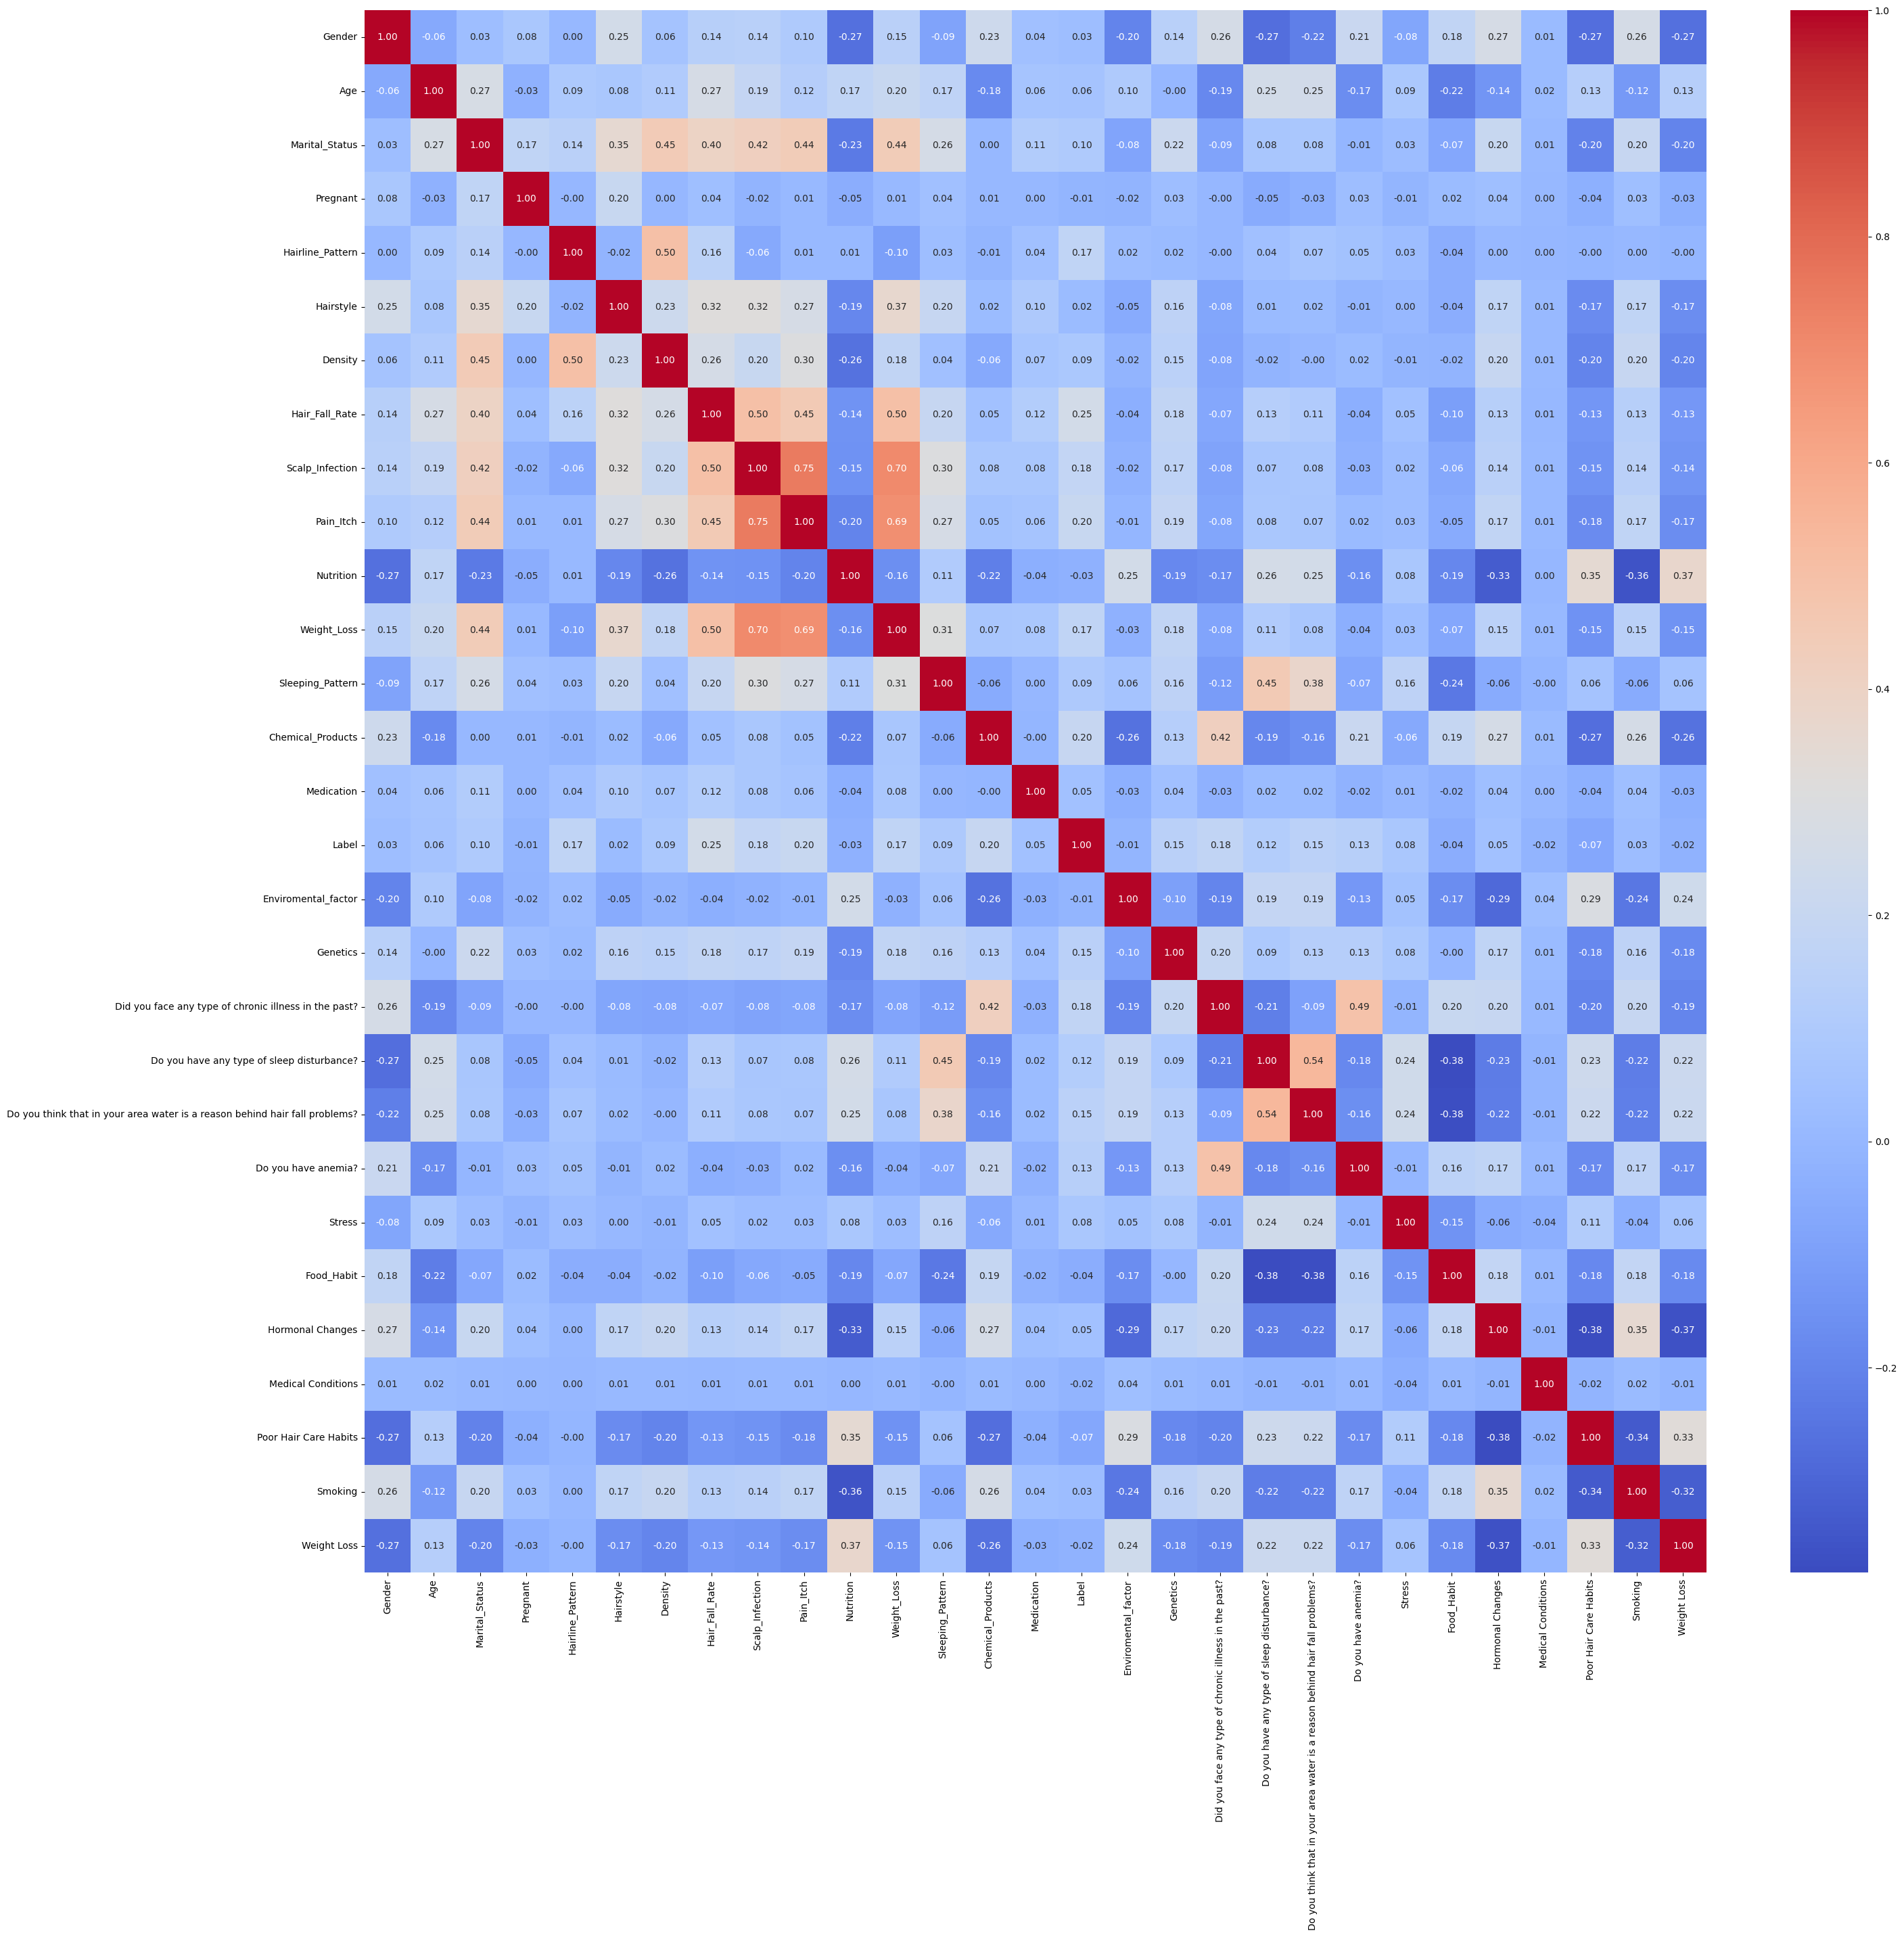

In [578]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = main_data.corr()

# Set the figure size
plt.figure(figsize=(32, 30))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.show()

In [579]:
main_data

,Gender,Age,Marital_Status,Pregnant,Hairline_Pattern,Hairstyle,Density,Hair_Fall_Rate,Scalp_Infection,Pain_Itch,...,Do you have any type of sleep disturbance?,Do you think that in your area water is a reason behind hair fall problems?,Do you have anemia?,Stress,Food_Habit,Hormonal Changes,Medical Conditions,Poor Hair Care Habits,Smoking,Weight Loss
957,1.0,20.032122,0.0,0.0,1.0,0.0,0.0,58.5,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
1748,0.0,41.994617,0.0,0.0,1.0,0.0,0.0,58.5,0.0,0.0,...,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0
1301,0.0,15.076524,0.0,0.0,1.0,0.0,0.0,58.5,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,0.0
1264,1.0,14.967336,0.0,0.0,1.0,0.0,0.0,58.5,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
2093,0.0,49.089885,0.0,0.0,1.0,0.0,0.0,58.5,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.0,25.041934,0.0,0.0,1.0,1.0,0.0,50.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
2113,0.0,50.027814,0.0,0.0,1.0,0.0,0.0,58.5,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0
302,0.0,25.998126,0.0,0.0,2.0,0.0,1.0,50.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
2552,0.0,38.013060,0.0,0.0,1.0,0.0,0.0,58.5,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,10.0,1.0,1.0,1.0


In [580]:
main_data['Label'].value_counts()

1    37545
0    31239
2     1216
Name: Label, dtype: int64

In [581]:
main_data.rename(columns={
    'Marital_Status': 'Marital Status',
    'Hairline_Pattern': 'Hairline Pattern',
    'Hair_Fall_Rate': 'Hair Fall Rate',
    'Scalp_Infection': 'Scalp Infection',
    'Pain_Itch': 'Scalp Pain/Itch',
    'Sleeping_Pattern': 'Sleeping Pattern',
    'Chemical_Products': 'Chemical Product Usage',
    'Enviromental_factor': 'Environmental Factor',
    'Did you face any type of chronic illness in the past?': 'Past Chronic Illness',
    'Do you have any type of sleep disturbance?': 'Sleep Disturbance',
    'Do you think that in your area water is a reason behind hair fall problems?': 'Water Quality Issue',
    'Do you have anemia?': 'Anemia',
    'Food_Habit': 'Food Habit',
    'Poor Hair Care Habits': 'Hair Care Habits'
}, inplace=True)

In [582]:
# Calculate the correlation of each column with the label
correlation_with_label = main_data.corr()['Label'].sort_values(ascending=False)

# Display the correlation
print(correlation_with_label)

Label                     1.000000
Hair Fall Rate            0.251987
Scalp Pain/Itch           0.203359
Chemical Product Usage    0.196415
Scalp Infection           0.182164
Past Chronic Illness      0.178371
Hairline Pattern          0.170576
Weight_Loss               0.170170
Water Quality Issue       0.148892
Genetics                  0.145365
Anemia                    0.134356
Sleep Disturbance         0.117127
Marital Status            0.103424
Sleeping Pattern          0.093690
Density                   0.085530
Stress                    0.080739
Age                       0.057565
Hormonal Changes          0.049284
Medication                0.047477
Gender                    0.029140
Smoking                   0.027634
Hairstyle                 0.022158
Pregnant                 -0.010646
Environmental Factor     -0.011376
Medical Conditions       -0.017747
Weight Loss              -0.024218
Nutrition                -0.028729
Food Habit               -0.044397
Hair Care Habits    

In [583]:
# Dropping unnecessary columns
columns_to_drop = ['Marital Status', 'Environmental Factor', 'Sleeping Pattern', 
                   'Scalp Pain/Itch', 'Anemia', 'Medical Conditions', 'Medication','Weight_Loss','Hairstyle','Pregnant']

# Ensure only one "Weight Loss" column is removed (if duplicate exists)
if 'Weight Loss' in main_data.columns:
    columns_to_drop.append('Weight Loss')  # Add only if it exists

# Drop the columns safely
main_data.drop(columns=columns_to_drop, inplace=True)


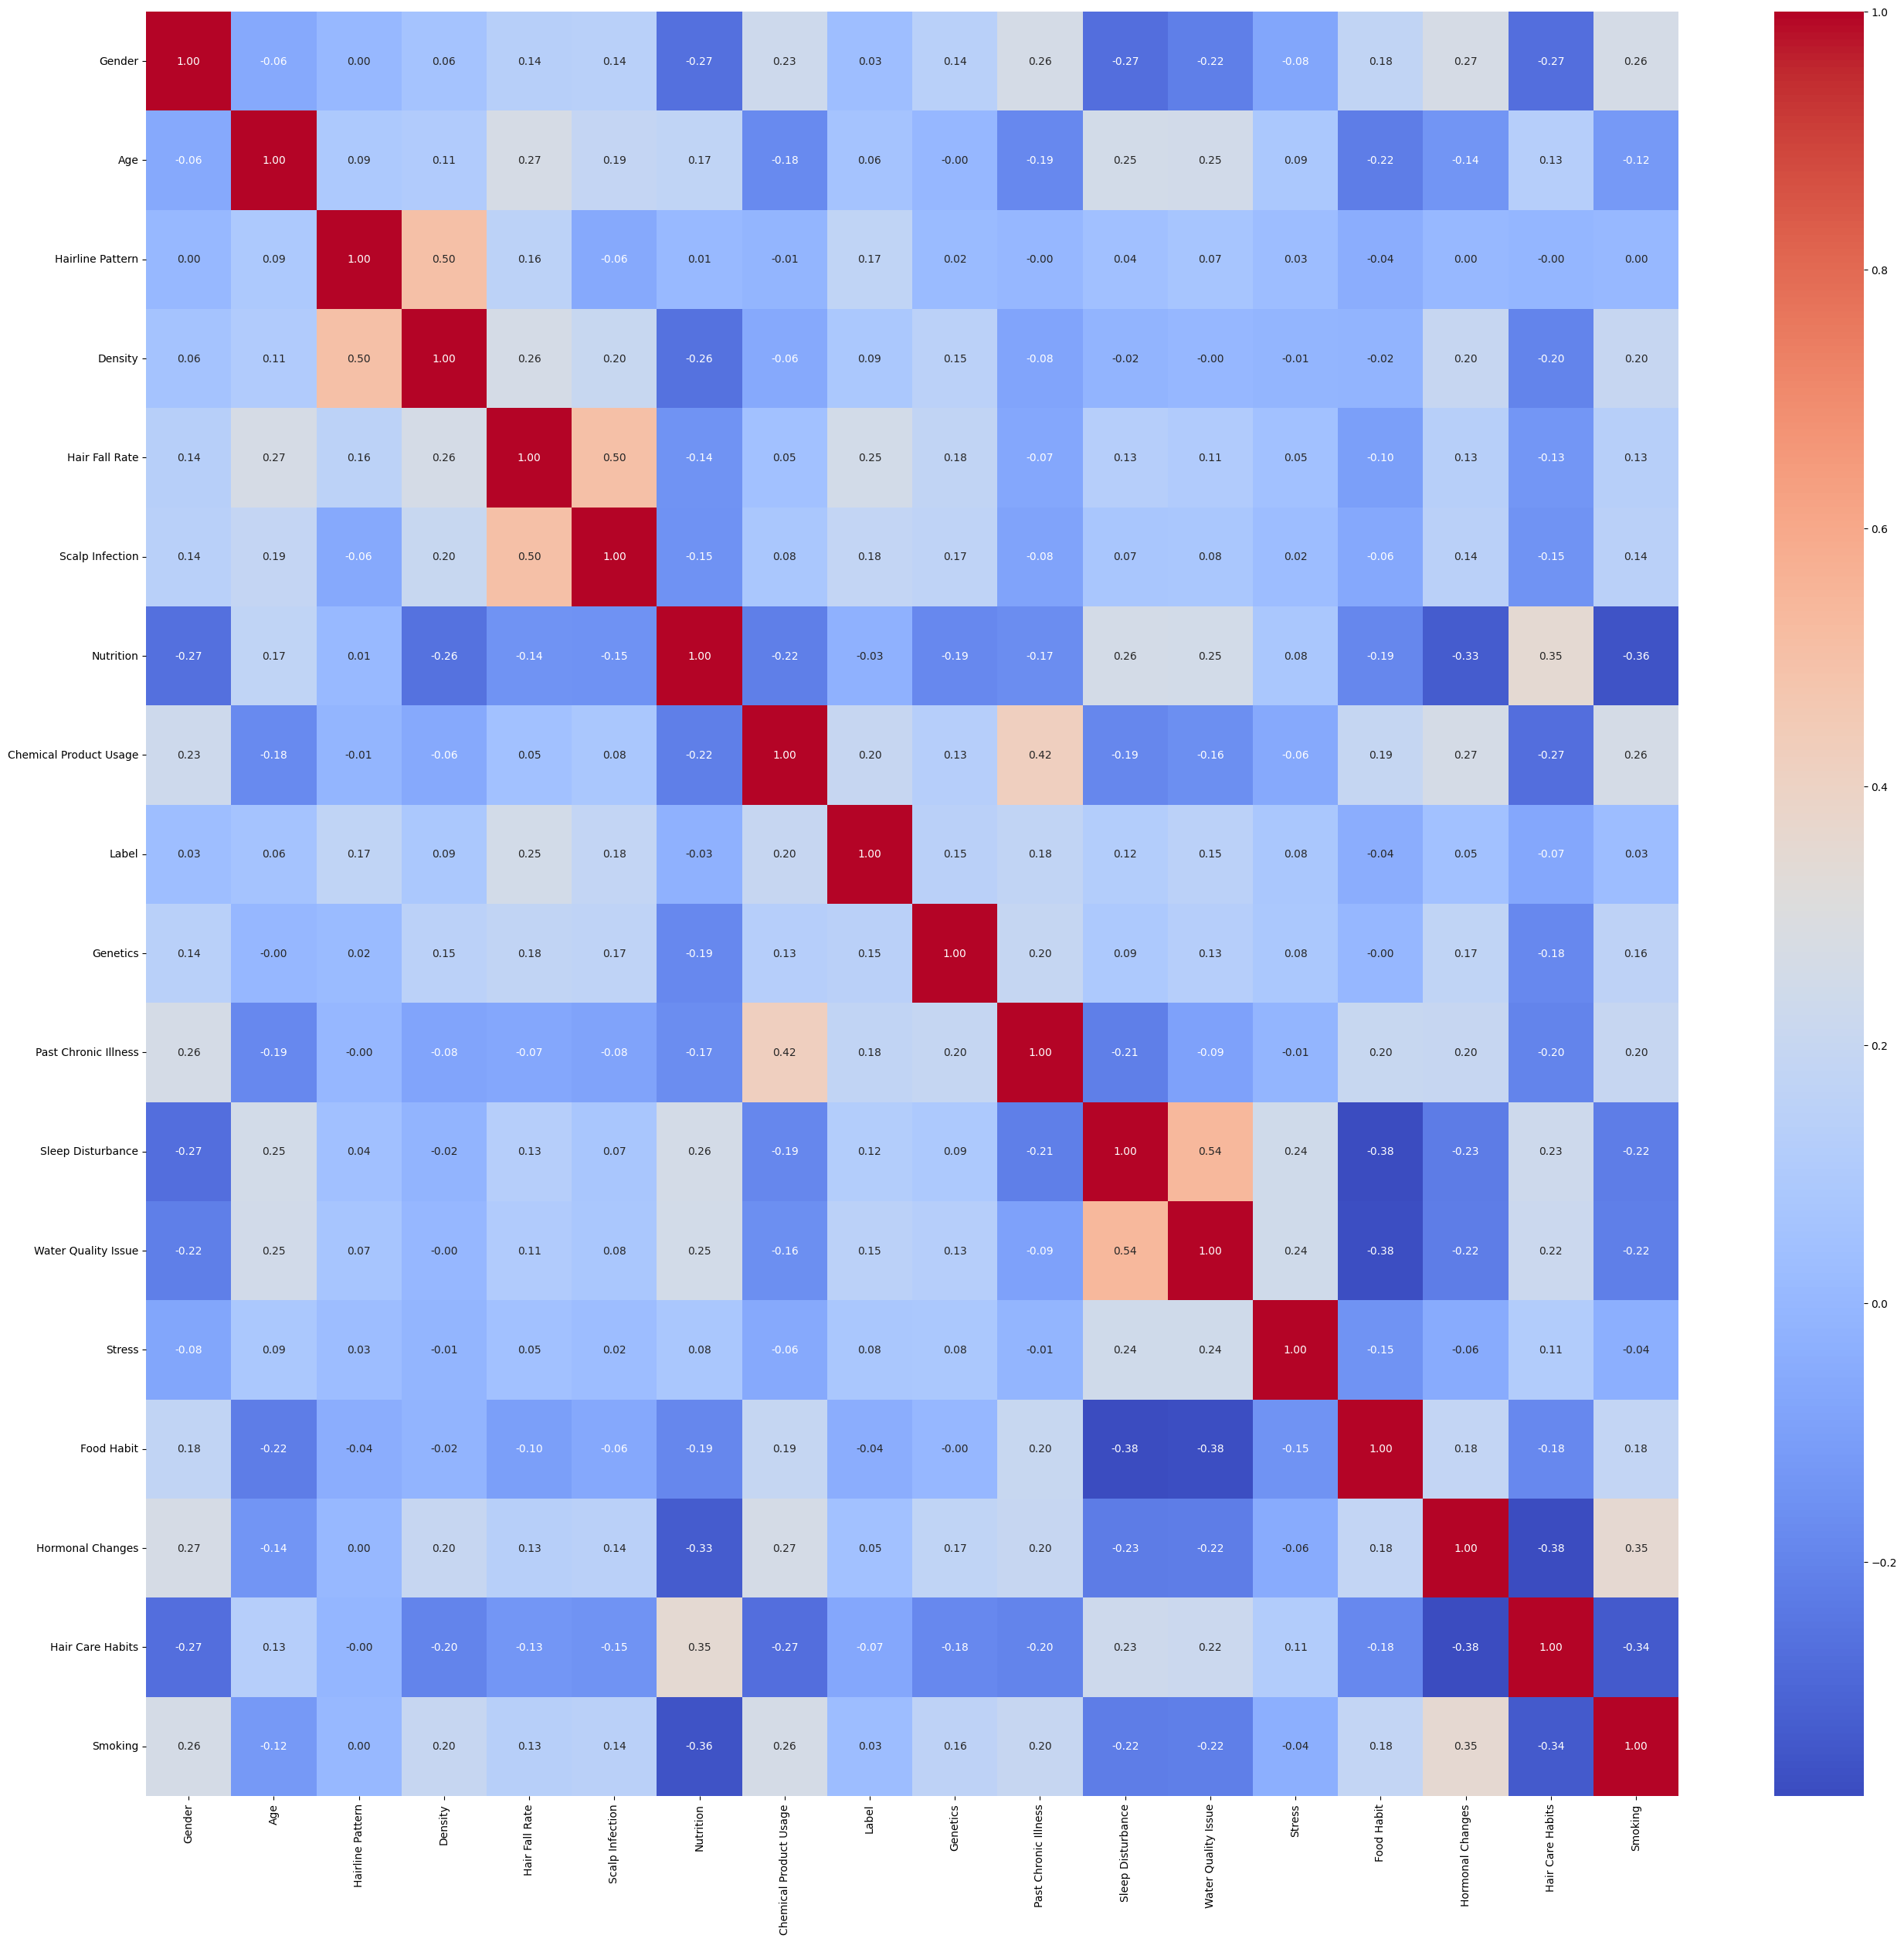

In [584]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = main_data.corr()

# Set the figure size
plt.figure(figsize=(32, 30))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.show()

In [585]:
main_data = main_data.astype(int)
main_data.dtypes

Gender                    int32
Age                       int32
Hairline Pattern          int32
Density                   int32
Hair Fall Rate            int32
Scalp Infection           int32
Nutrition                 int32
Chemical Product Usage    int32
Label                     int32
Genetics                  int32
Past Chronic Illness      int32
Sleep Disturbance         int32
Water Quality Issue       int32
Stress                    int32
Food Habit                int32
Hormonal Changes          int32
Hair Care Habits          int32
Smoking                   int32
dtype: object

In [586]:
main_data.columns

Index(['Gender', 'Age', 'Hairline Pattern', 'Density', 'Hair Fall Rate',
       'Scalp Infection', 'Nutrition', 'Chemical Product Usage', 'Label',
       'Genetics', 'Past Chronic Illness', 'Sleep Disturbance',
       'Water Quality Issue', 'Stress', 'Food Habit', 'Hormonal Changes',
       'Hair Care Habits', 'Smoking'],
      dtype='object')

In [587]:
main_data['Hair Fall Rate'].value_counts()

58     48053
40      2945
252     2123
20      1191
50      1154
       ...  
54        23
320       23
28        22
107       20
75        20
Name: Hair Fall Rate, Length: 147, dtype: int64

In [588]:
main_data['Label'].value_counts()

1    37545
0    31239
2     1216
Name: Label, dtype: int64

In [589]:
main_data.to_csv('final_data.csv', index=False)

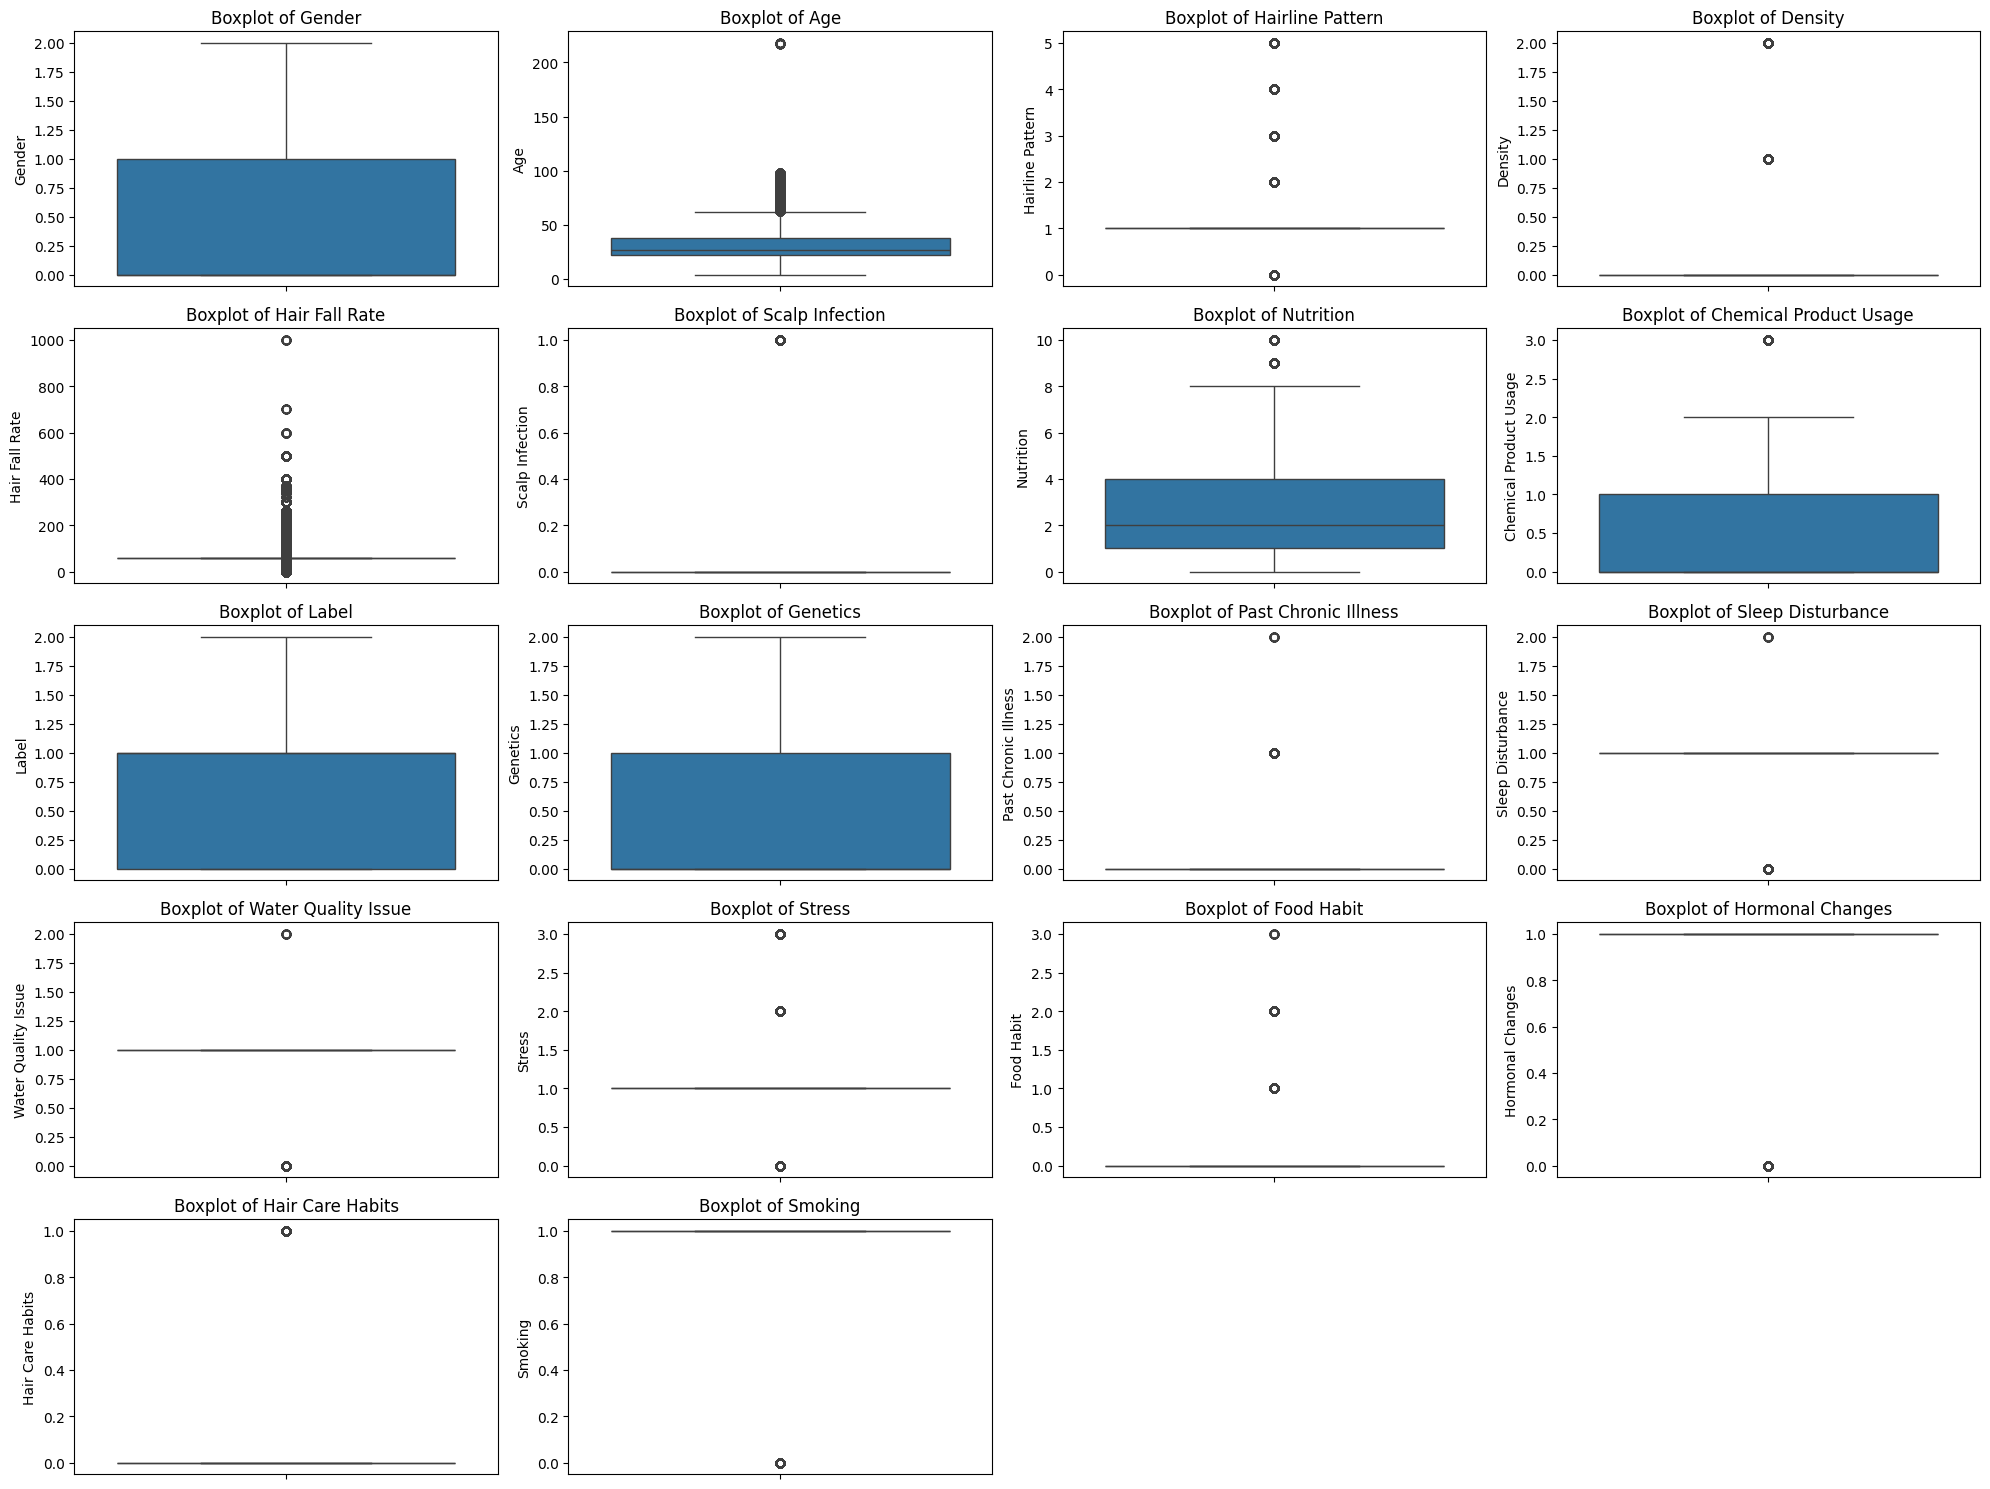

In [590]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 15))

# Create a boxplot for each column
for i, column in enumerate(main_data.columns, 1):
    plt.subplot(5, 4, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(y=main_data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

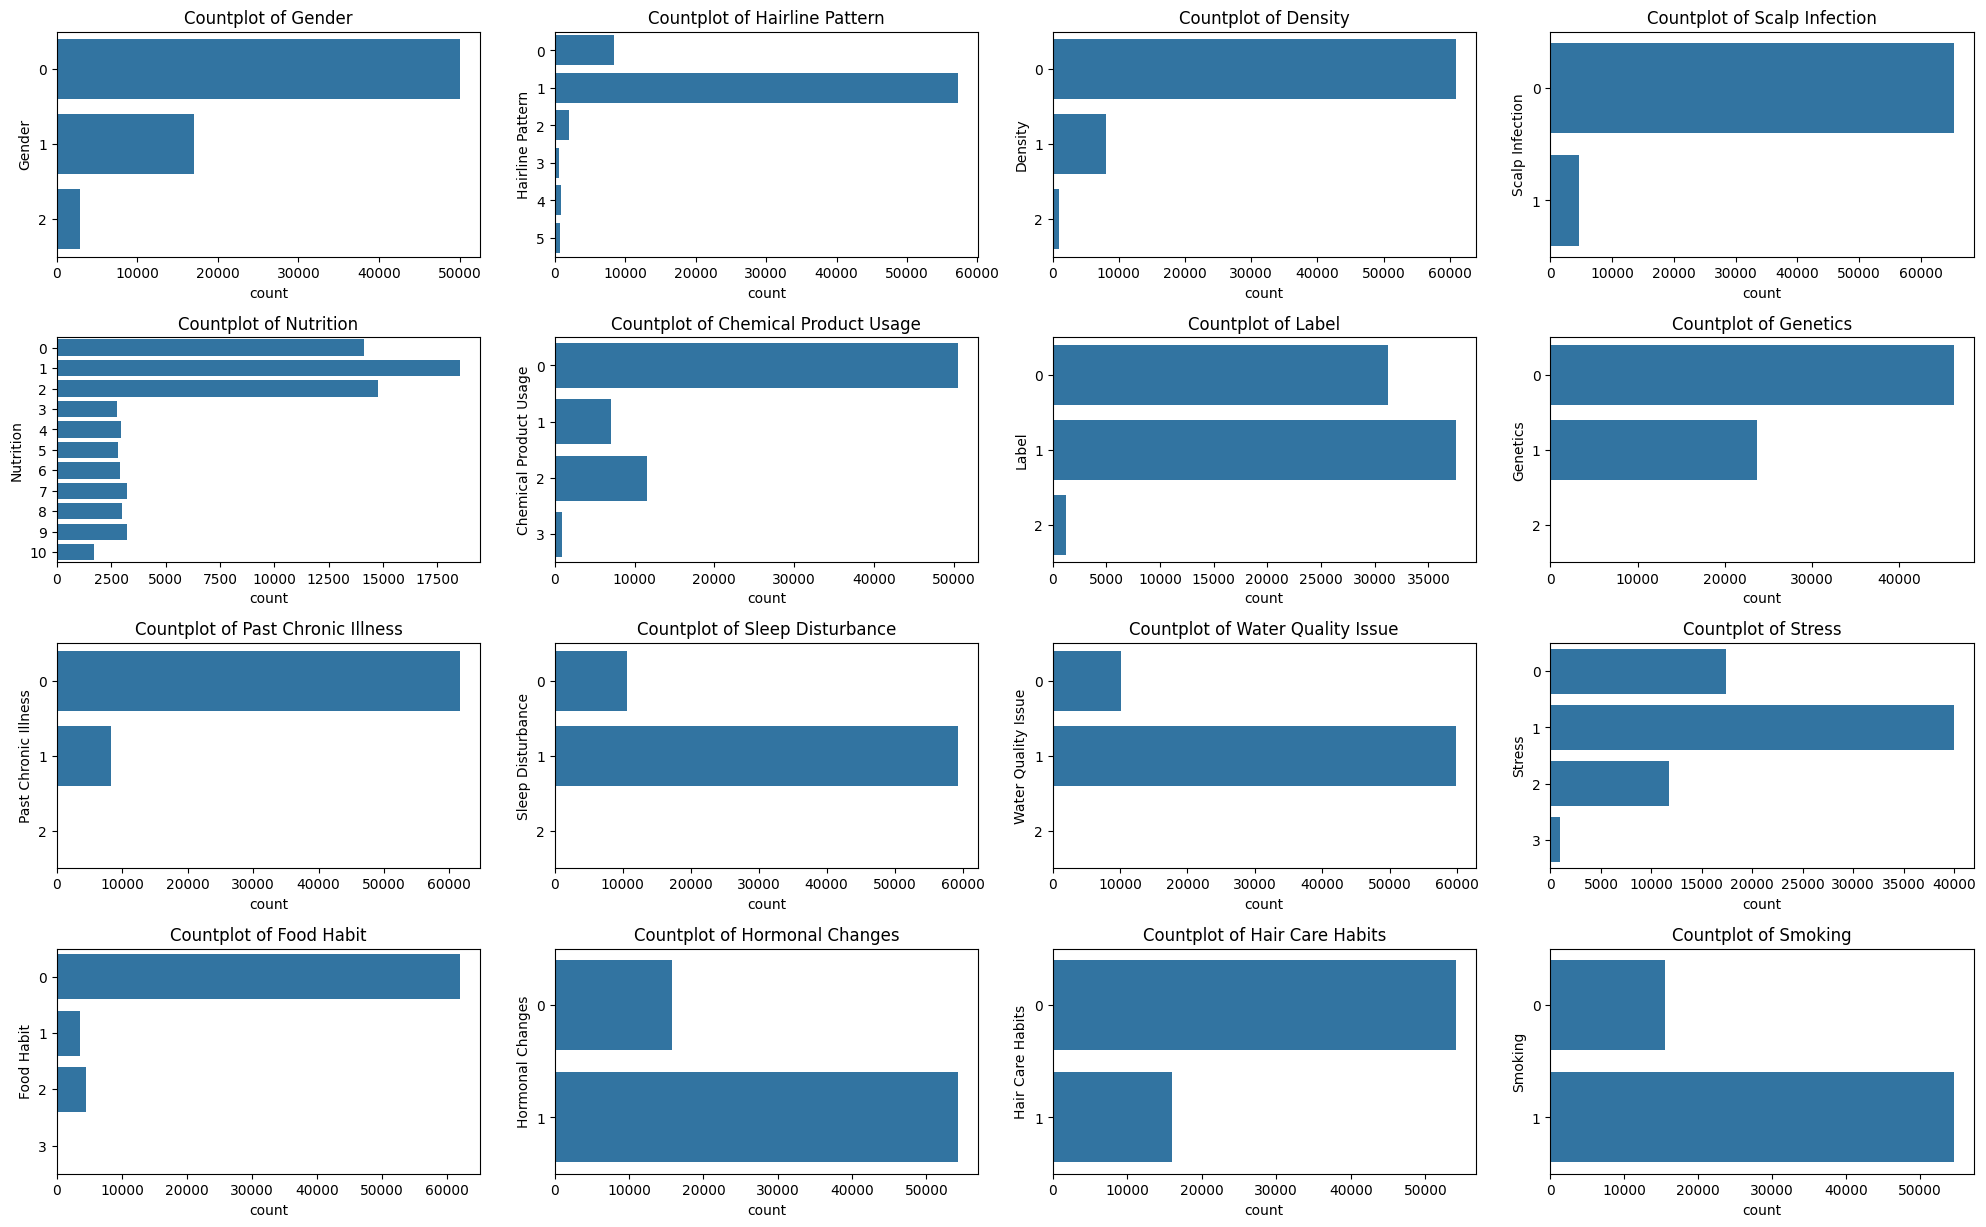

In [591]:
import seaborn as sns

import matplotlib.pyplot as plt

# List of columns to plot
columns_to_plot = [col for col in main_data.columns if col not in ['Age', 'Hair Fall Rate']]

# Set the figure size
plt.figure(figsize=(20, 15))

# Create a count plot for each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(5, 4, i)  # Adjust the number of rows and columns as needed
    sns.countplot(y=main_data[column])
    plt.title(f'Countplot of {column}')

plt.tight_layout()
plt.show()

In [592]:
main_data.columns

Index(['Gender', 'Age', 'Hairline Pattern', 'Density', 'Hair Fall Rate',
       'Scalp Infection', 'Nutrition', 'Chemical Product Usage', 'Label',
       'Genetics', 'Past Chronic Illness', 'Sleep Disturbance',
       'Water Quality Issue', 'Stress', 'Food Habit', 'Hormonal Changes',
       'Hair Care Habits', 'Smoking'],
      dtype='object')

In [593]:
main_data.drop(columns=['Scalp Infection', 'Density'], inplace=True)

In [594]:
main_data.astype(int)

,Gender,Age,Hairline Pattern,Hair Fall Rate,Nutrition,Chemical Product Usage,Label,Genetics,Past Chronic Illness,Sleep Disturbance,Water Quality Issue,Stress,Food Habit,Hormonal Changes,Hair Care Habits,Smoking
957,1,20,1,58,1,0,1,1,0,1,1,1,0,1,0,1
1748,0,41,1,58,9,0,0,0,0,1,1,2,0,1,1,1
1301,0,15,1,58,1,2,1,0,0,1,1,0,0,1,0,1
1264,1,14,1,58,2,2,1,1,1,0,1,1,0,1,0,1
2093,0,49,1,58,7,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0,25,1,50,1,0,0,0,0,1,1,1,0,1,0,1
2113,0,50,1,58,0,0,0,1,0,1,1,0,0,0,1,1
302,0,25,2,50,0,1,1,1,0,1,1,1,0,1,0,1
2552,0,38,1,58,5,0,1,0,0,1,1,0,0,1,1,1


In [595]:
main_data['Smoking'].value_counts()

1    54513
0    15487
Name: Smoking, dtype: int64

In [596]:
main_data

,Gender,Age,Hairline Pattern,Hair Fall Rate,Nutrition,Chemical Product Usage,Label,Genetics,Past Chronic Illness,Sleep Disturbance,Water Quality Issue,Stress,Food Habit,Hormonal Changes,Hair Care Habits,Smoking
957,1,20,1,58,1,0,1,1,0,1,1,1,0,1,0,1
1748,0,41,1,58,9,0,0,0,0,1,1,2,0,1,1,1
1301,0,15,1,58,1,2,1,0,0,1,1,0,0,1,0,1
1264,1,14,1,58,2,2,1,1,1,0,1,1,0,1,0,1
2093,0,49,1,58,7,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0,25,1,50,1,0,0,0,0,1,1,1,0,1,0,1
2113,0,50,1,58,0,0,0,1,0,1,1,0,0,0,1,1
302,0,25,2,50,0,1,1,1,0,1,1,1,0,1,0,1
2552,0,38,1,58,5,0,1,0,0,1,1,0,0,1,1,1


In [597]:
main_data = main_data.astype(int)
main_data

,Gender,Age,Hairline Pattern,Hair Fall Rate,Nutrition,Chemical Product Usage,Label,Genetics,Past Chronic Illness,Sleep Disturbance,Water Quality Issue,Stress,Food Habit,Hormonal Changes,Hair Care Habits,Smoking
957,1,20,1,58,1,0,1,1,0,1,1,1,0,1,0,1
1748,0,41,1,58,9,0,0,0,0,1,1,2,0,1,1,1
1301,0,15,1,58,1,2,1,0,0,1,1,0,0,1,0,1
1264,1,14,1,58,2,2,1,1,1,0,1,1,0,1,0,1
2093,0,49,1,58,7,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0,25,1,50,1,0,0,0,0,1,1,1,0,1,0,1
2113,0,50,1,58,0,0,0,1,0,1,1,0,0,0,1,1
302,0,25,2,50,0,1,1,1,0,1,1,1,0,1,0,1
2552,0,38,1,58,5,0,1,0,0,1,1,0,0,1,1,1


In [598]:
def get_value_counts_of_all_columns(df):
    # Loop through all columns and get the value counts
    value_counts_dict = {}
    for column in df.columns:
        value_counts_dict[column] = df[column].value_counts()
    return value_counts_dict

# Assuming 'main_data' is your dataset (Pandas DataFrame)
value_counts = get_value_counts_of_all_columns(main_data)

# Print the value counts for all columns
for column, counts in value_counts.items():
    print(f"Value counts for column '{column}':")
    print(counts)
    print("\n")

Value counts for column 'Gender':
0    50046
1    17025
2     2929
Name: Gender, dtype: int64


Value counts for column 'Age':
22     3962
21     3576
23     3474
25     3339
24     3206
       ... 
217      14
73       13
60       13
95       13
72       12
Name: Age, Length: 89, dtype: int64


Value counts for column 'Hairline Pattern':
1    57212
0     8469
2     2076
4      928
5      681
3      634
Name: Hairline Pattern, dtype: int64


Value counts for column 'Hair Fall Rate':
58     48053
40      2945
252     2123
20      1191
50      1154
       ...  
54        23
320       23
28        22
107       20
75        20
Name: Hair Fall Rate, Length: 147, dtype: int64


Value counts for column 'Nutrition':
1     18539
2     14777
0     14122
7      3230
9      3208
8      2992
4      2964
6      2901
5      2790
3      2757
10     1720
Name: Nutrition, dtype: int64


Value counts for column 'Chemical Product Usage':
0    50505
2    11598
1     7002
3      895
Name: Chemical Product U

In [599]:
main_data.duplicated().sum()


50183

In [600]:
main_data.drop_duplicates(inplace=True)

In [601]:
main_data.duplicated().sum()

0

In [602]:
main_data

,Gender,Age,Hairline Pattern,Hair Fall Rate,Nutrition,Chemical Product Usage,Label,Genetics,Past Chronic Illness,Sleep Disturbance,Water Quality Issue,Stress,Food Habit,Hormonal Changes,Hair Care Habits,Smoking
957,1,20,1,58,1,0,1,1,0,1,1,1,0,1,0,1
1748,0,41,1,58,9,0,0,0,0,1,1,2,0,1,1,1
1301,0,15,1,58,1,2,1,0,0,1,1,0,0,1,0,1
1264,1,14,1,58,2,2,1,1,1,0,1,1,0,1,0,1
2093,0,49,1,58,7,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,0,47,1,58,0,1,1,0,0,1,1,2,0,1,0,0
1317,1,18,1,58,2,0,2,1,0,1,0,0,2,1,0,1
458,0,19,1,3,0,0,1,0,0,1,1,1,0,1,0,1
451,1,56,0,300,0,3,1,1,0,1,1,1,0,1,0,1


In [603]:
main_data['Hairline Pattern'] = main_data['Hairline Pattern'] * 2
main_data['Chemical Product Usage'] = main_data['Chemical Product Usage'] * 1.5
main_data['Genetics'] = main_data['Genetics'] * 1.5
main_data['Past Chronic Illness'] = main_data['Past Chronic Illness'] * 1.5
main_data['Hair Care Habits'] = main_data['Hair Care Habits'] * 1.2


In [604]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Important Features (Assigning Higher Weights)
feature_weights = {
    'Hair Fall Rate': 19,  # Very Important Feature
    'Genetics': 2,  # Important
    'Stress': 2,  # Important
    'Hormonal Changes': 2,  # Important
    'Sleep Disturbance': 2,  # Important
}

# Prepare Features and Target
X = main_data.drop('Label', axis=1)  # Features
y = main_data['Label']  # Target variable

# Apply feature importance weights (Multiply Selected Columns)
for feature, weight in feature_weights.items():
    if feature in X.columns:
        X[feature] = X[feature] * weight  # Boost its value

# First split: 80% train, 20% temp (which will be split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: 50% validation, 50% test from the temp set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize SMOTE (to handle class imbalance)
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic samples on the training set only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the resampled training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set
y_val_pred = rf_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)

# Display the results for the validation set
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("Validation Classification Report:")
print(val_class_report)

# Predict on the test set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

# Display the results for the test set
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Test Classification Report:")
print(test_class_report)

# Show feature importances
importances = rf_classifier.feature_importances_
feature_importance_dict = dict(zip(X.columns, importances))

print("Feature Importances:", feature_importance_dict)

Validation Accuracy: 0.6039
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.60      0.62       836
           1       0.70      0.66      0.68      1040
           2       0.03      0.05      0.03       106

    accuracy                           0.60      1982
   macro avg       0.45      0.44      0.44      1982
weighted avg       0.63      0.60      0.62      1982

Test Accuracy: 0.6211
Test Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       907
           1       0.67      0.68      0.68       977
           2       0.04      0.07      0.05        98

    accuracy                           0.62      1982
   macro avg       0.47      0.46      0.46      1982
weighted avg       0.65      0.62      0.63      1982

Feature Importances: {'Gender': 0.037286711527736875, 'Age': 0.3150160834464933, 'Hairline Pattern': 0.03560284986784431, 'Hai

In [605]:
X_train_resampled

,Gender,Age,Hairline Pattern,Hair Fall Rate,Nutrition,Chemical Product Usage,Genetics,Past Chronic Illness,Sleep Disturbance,Water Quality Issue,Stress,Food Habit,Hormonal Changes,Hair Care Habits,Smoking
0,0,30,2,1102,7,0.000000,0.0,0.0,2,1,2,0,2,0.000000,0
1,0,24,2,1102,7,0.000000,3.0,0.0,2,1,0,0,0,0.000000,0
2,1,28,2,1102,2,3.000000,0.0,0.0,2,1,2,0,2,0.000000,1
3,2,25,2,1102,0,0.000000,3.0,0.0,2,1,0,0,2,1.200000,1
4,2,18,2,2850,0,0.000000,3.0,0.0,2,1,2,0,2,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24703,1,55,0,4370,0,0.000000,0.0,0.0,2,1,2,0,2,0.000000,1
24704,0,32,2,1102,5,0.000000,0.0,0.0,2,1,0,0,2,0.000000,1
24705,0,27,2,1102,1,0.000000,3.0,0.0,2,1,2,0,1,0.591273,0
24706,0,20,0,380,1,0.502452,0.0,0.0,2,1,2,0,2,0.000000,1


In [606]:
from sklearn.feature_selection import mutual_info_classif

# Compute Mutual Information
mi = mutual_info_classif(X_train_resampled, y_train_resampled)

# Display MI Scores
for feature, score in zip(X_train_resampled.columns, mi):
    print(f"Feature: {feature}, MI Score: {score}")

Feature: Gender, MI Score: 0.011345936406269352
Feature: Age, MI Score: 0.023765508741280916
Feature: Hairline Pattern, MI Score: 0.040107627011500835
Feature: Hair Fall Rate, MI Score: 0.10214698013329082
Feature: Nutrition, MI Score: 0.00497873804714688
Feature: Chemical Product Usage, MI Score: 0.045133588818063286
Feature: Genetics, MI Score: 0.04019057254725089
Feature: Past Chronic Illness, MI Score: 0.03818085931713244
Feature: Sleep Disturbance, MI Score: 0.015288884210158837
Feature: Water Quality Issue, MI Score: 0.011550794927260633
Feature: Stress, MI Score: 0.03238920860703831
Feature: Food Habit, MI Score: 0.008199123729522917
Feature: Hormonal Changes, MI Score: 0.02279072981586161
Feature: Hair Care Habits, MI Score: 0.052489952518607996
Feature: Smoking, MI Score: 0.0010399525785054209


In [607]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Define the parameter grid for Random Forest
# param_grid_rf = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10, 15],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# # Initialize GridSearchCV
# grid_search_rf = GridSearchCV(
#     estimator=RandomForestClassifier(random_state=42),  # Base classifier
#     param_grid=param_grid_rf,
#     cv=3,  # 3-fold cross-validation on the training set
#     scoring='accuracy',  # Metric to optimize
#     n_jobs=-1  # Use all available CPU cores
# )

# # Fit GridSearchCV on the resampled training data
# grid_search_rf.fit(X_train_resampled, y_train_resampled)

# # Print the best parameters and best score (from cross-validation on the training set)
# print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
# print("Best Cross-Validation Accuracy (on Training Set):", grid_search_rf.best_score_)

# # Get the best model from GridSearchCV
# best_rf_model = grid_search_rf.best_estimator_

# # Evaluate the best model on the validation set
# y_val_pred = best_rf_model.predict(X_val)
# print("Validation Set Results:")
# print("Accuracy:", accuracy_score(y_val, y_val_pred))
# print("Classification Report:\n", classification_report(y_val, y_val_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# # Evaluate the best model on the test set
# y_test_pred = best_rf_model.predict(X_test)
# print("Test Set Results:")
# print("Accuracy:", accuracy_score(y_test, y_test_pred))
# print("Classification Report:\n", classification_report(y_test, y_test_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

In [608]:
main_data['Hair Fall Rate'].value_counts()

58     13092
252      605
40       511
20       400
10       344
       ...  
69         7
154        7
107        5
700        5
210        5
Name: Hair Fall Rate, Length: 147, dtype: int64

In [609]:
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Display top important features
print(feature_importance)

                   Feature  Importance
1                      Age    0.315016
4                Nutrition    0.122966
3           Hair Fall Rate    0.098937
10                  Stress    0.076812
5   Chemical Product Usage    0.064943
6                 Genetics    0.056582
13        Hair Care Habits    0.052642
7     Past Chronic Illness    0.038217
0                   Gender    0.037287
2         Hairline Pattern    0.035603
11              Food Habit    0.024681
8        Sleep Disturbance    0.022553
12        Hormonal Changes    0.022271
9      Water Quality Issue    0.018318
14                 Smoking    0.013172


In [610]:
main_data.columns

Index(['Gender', 'Age', 'Hairline Pattern', 'Hair Fall Rate', 'Nutrition',
       'Chemical Product Usage', 'Label', 'Genetics', 'Past Chronic Illness',
       'Sleep Disturbance', 'Water Quality Issue', 'Stress', 'Food Habit',
       'Hormonal Changes', 'Hair Care Habits', 'Smoking'],
      dtype='object')

### Using XGB BOOST

In [611]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data
X = main_data.drop('Label', axis=1)  # Features
y = main_data['Label']  # Target variable

# First split: 80% train, 20% temp (which will be split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: 50% validation, 50% test from the temp set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize SMOTE (to handle class imbalance)
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic samples on the training set only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the classifier on the resampled training data
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set
y_val_pred = xgb_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)

# Display the results for the validation set
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("Validation Classification Report:")
print(val_class_report)

# Predict on the test set
y_test_pred = xgb_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

# Display the results for the test set
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Test Classification Report:")
print(test_class_report)

Validation Accuracy: 0.6655
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       836
           1       0.78      0.71      0.74      1040
           2       0.06      0.12      0.08       106

    accuracy                           0.67      1982
   macro avg       0.51      0.50      0.50      1982
weighted avg       0.71      0.67      0.68      1982

Test Accuracy: 0.6539
Test Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.67      0.69       907
           1       0.73      0.69      0.71       977
           2       0.08      0.18      0.11        98

    accuracy                           0.65      1982
   macro avg       0.51      0.51      0.50      1982
weighted avg       0.69      0.65      0.67      1982



In [612]:
main_data

,Gender,Age,Hairline Pattern,Hair Fall Rate,Nutrition,Chemical Product Usage,Label,Genetics,Past Chronic Illness,Sleep Disturbance,Water Quality Issue,Stress,Food Habit,Hormonal Changes,Hair Care Habits,Smoking
957,1,20,2,58,1,0.0,1,1.5,0.0,1,1,1,0,1,0.0,1
1748,0,41,2,58,9,0.0,0,0.0,0.0,1,1,2,0,1,1.2,1
1301,0,15,2,58,1,3.0,1,0.0,0.0,1,1,0,0,1,0.0,1
1264,1,14,2,58,2,3.0,1,1.5,1.5,0,1,1,0,1,0.0,1
2093,0,49,2,58,7,0.0,0,0.0,0.0,1,1,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,0,47,2,58,0,1.5,1,0.0,0.0,1,1,2,0,1,0.0,0
1317,1,18,2,58,2,0.0,2,1.5,0.0,1,0,0,2,1,0.0,1
458,0,19,2,3,0,0.0,1,0.0,0.0,1,1,1,0,1,0.0,1
451,1,56,0,300,0,4.5,1,1.5,0.0,1,1,1,0,1,0.0,1


In [613]:
X_train_resampled

,Gender,Age,Hairline Pattern,Hair Fall Rate,Nutrition,Chemical Product Usage,Genetics,Past Chronic Illness,Sleep Disturbance,Water Quality Issue,Stress,Food Habit,Hormonal Changes,Hair Care Habits,Smoking
0,0,30,2,58,7,0.000000,0.0,0.0,1,1,1,0,1,0.000000,0
1,0,24,2,58,7,0.000000,1.5,0.0,1,1,0,0,0,0.000000,0
2,1,28,2,58,2,3.000000,0.0,0.0,1,1,1,0,1,0.000000,1
3,2,25,2,58,0,0.000000,1.5,0.0,1,1,0,0,1,1.200000,1
4,2,18,2,150,0,0.000000,1.5,0.0,1,1,1,0,1,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24703,1,55,0,230,0,0.000000,0.0,0.0,1,1,1,0,1,0.000000,1
24704,0,32,2,58,5,0.000000,0.0,0.0,1,1,0,0,0,0.000000,1
24705,0,27,2,58,1,0.000000,1.5,0.0,1,1,1,0,0,0.591273,0
24706,0,20,0,20,1,0.502452,0.0,0.0,1,1,1,0,1,0.000000,1


In [614]:
y_train_resampled

0        1
1        1
2        1
3        0
4        0
        ..
24703    2
24704    2
24705    2
24706    2
24707    2
Name: Label, Length: 24708, dtype: int32

## PREDICTION


In [ ]:


def get_user_input():
    user_input = {}
    
    print("Please enter the following details:")

    user_input['Gender'] = int(input("Gender (0: Female, 1: Male, 2: Other): "))
    user_input['Age'] = int(input("Current Age (e.g., 22, 23, etc.): "))
    user_input['Hairline Pattern'] = int(input("Hairline Pattern (0: Normal, 1: Receding, 2, 3, 4, 5: Other variations): "))
    user_input['Hair Fall Rate'] = float(input("Hair Fall Rate (e.g., 50-150 strands per day): "))
    user_input['Nutrition'] = float(input("Nutrition Level (1-10, 10 being excellent): "))
    user_input['Chemical Product Usage'] = int(input("Chemical Product Usage (0: No, 1, 2, 3: Varying levels of use): "))
    user_input['Genetics'] = int(input("Family History of Hair Loss (0: No, 1: Yes, 2: High risk): "))
    user_input['Past Chronic Illness'] = int(input("Past Chronic Illness (0: No, 1: Yes, 2: Severe): "))
    user_input['Sleep Disturbance'] = int(input("Sleep Disturbance (0: No, 1: Yes, 2: Severe issues): "))
    user_input['Water Quality Issue'] = int(input("Poor Water Quality (0: No, 1: Yes, 2: Very bad): "))
    user_input['Stress'] = int(input("Stress Levels (0: Low, 1: Medium, 2: High, 3: Extreme): "))
    user_input['Food Habit'] = int(input("Food Habit (0: Healthy, 1: Unhealthy, 2: Junk food, 3: Worst diet): "))
    user_input['Hormonal Changes'] = int(input("Hormonal Imbalance (0: No, 1: Yes): "))
    user_input['Hair Care Habits'] = int(input("Poor Hair Care Habits (0: No, 1: Yes): "))
    user_input['Smoking'] = int(input("Smoking (0: No, 1: Yes): "))

    return user_input


def adjust_age_based_on_features(user_input, predicted_age):
    # Adjusting the predicted age based on the high-importance features
    weight_factors = {
        "Chemical Product Usage": 1.4,  # This could be a factor to increase the age slightly
        "Genetics": 1.3,  # Higher weight for family history
        "Past Chronic Illness": 1.1,  # Slight adjustment if there's a history of illness
        "Sleep Disturbance": 1.2,  # Sleep disturbance increases the risk slightly
        "Water Quality Issue": 1.1,  # Water quality issue could also slightly increase age prediction
        "Stress": 1.2,  # Stress can accelerate hair fall, so adjust accordingly
        "Food Habit": 1.3  # Poor food habits could accelerate hair loss
    }
    
    adjusted_age = predicted_age
    for feature, weight in weight_factors.items():
        if user_input[feature] == 2:  # Higher value means worse factor (e.g., 2 for high usage or poor quality)
            adjusted_age += 1  # You can modify this factor based on how much influence you want to give each feature
    
    return adjusted_age

def predict_hair_fall_risk(model, scaler, X_train_resampled, y_train_resampled):
    # Get user input details
    user_input = get_user_input()  # Assume a function to collect user input as before

    # Define the feature order
    feature_order = ['Gender', 'Age', 'Hairline Pattern', 'Hair Fall Rate', 'Nutrition',
                     'Chemical Product Usage', 'Genetics', 'Past Chronic Illness',
                     'Sleep Disturbance', 'Water Quality Issue', 'Stress', 'Food Habit',
                     'Hormonal Changes', 'Hair Care Habits', 'Smoking']
    
    # Prepare the user input as a feature array
    user_data = np.array([[user_input[feature] for feature in feature_order]])
    
    # Scale user input if a scaler is provided
    if scaler:
        user_data = scaler.transform(user_data)

    # Make prediction for risk level
    prediction = model.predict(user_data)[0]
    
    # Map the prediction to risk level (0 = Low, 1 = Medium, 2 = High)
    risk_mapping = {0: "Low Risk", 1: "Medium Risk", 2: "High Risk"}
    risk_level = risk_mapping.get(prediction, "Unknown")

    # Now, using the 'Label' column from y_train_resampled to predict the age when hair loss might start
    user_age = user_input["Age"]
    
    if risk_level in ["High Risk", "Medium Risk"]:
        # Filter the dataset based on the predicted risk level (using y_train_resampled and X_train_resampled)
        risk_ages = X_train_resampled[y_train_resampled == prediction]['Age']
        
        # Calculate the average age for people in that risk category
        avg_age = risk_ages.mean()  # Average age of people who experienced the same risk level

        # For Medium Risk, calculate average first, then add 5 years
        if risk_level == "Medium Risk":
            predicted_age = (avg_age + user_age) / 2  # First calculate average
            predicted_age += 5  # Then add 5 years to the predicted age

        # For High Risk, calculate without any additional years
        elif risk_level == "High Risk":
            predicted_age = (avg_age + user_age) / 2

        # Adjust age based on important features
        adjusted_age = adjust_age_based_on_features(user_input, predicted_age)

        print(f"\nPredicted Hair Fall Risk: {risk_level}")
        print(f"Estimated Age When Hair Fall Might Start: {adjusted_age:.2f}")
        years = int(adjusted_age)
        months = round((adjusted_age - years) * 12)
        print(f"Estimated Age When Hair Fall Might Start: {years} years and {months} months")
    
    else:
        # For low risk, no prediction is required.
        print(f"\nPredicted Hair Fall Risk: {risk_level}")
        print("No significant risk predicted for hair fall. However, it's important to care for your hair health to avoid future problems.")
        


In [616]:
predict_hair_fall_risk(best_rf_model, None, X_train_resampled,y_train_resampled)


Please enter the following details:

Predicted Hair Fall Risk: High Risk
Estimated Age When Hair Fall Might Start: 25.78
Estimated Age When Hair Fall Might Start: 25 years and 9 months


c:\Users\Nitro\anaconda3\envs\test_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
